In [1]:
!pip install pandas rdkit pip matplotlib

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw
import matplotlib.pyplot as plt
from rdkit import RDLogger         

In [3]:
chembl_data = pd.read_csv(r"C:\Users\arthu\OneDrive\Desktop\denovoexercises\Exercises\chembl_filtr.csv", delimiter=';')

In [4]:
chembl_data = chembl_data.dropna(subset=["Smiles"])

In [5]:
chembl_data.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Np Likeness Score',
       'Molecular Species', 'Molecular Formula', 'Smiles', 'Inchi Key',
       'Inchi', 'Withdrawn Flag', 'Orphan'],
      dtype='object')

In [6]:
f"Total molecules with SMILES: {len(chembl_data)}"

'Total molecules with SMILES: 1556956'

In [7]:
top_10_heaviest = chembl_data.nlargest(10, 'Molecular Weight')

In [8]:
molecules = [Chem.MolFromSmiles(smiles) for smiles in top_10_heaviest['Smiles']]

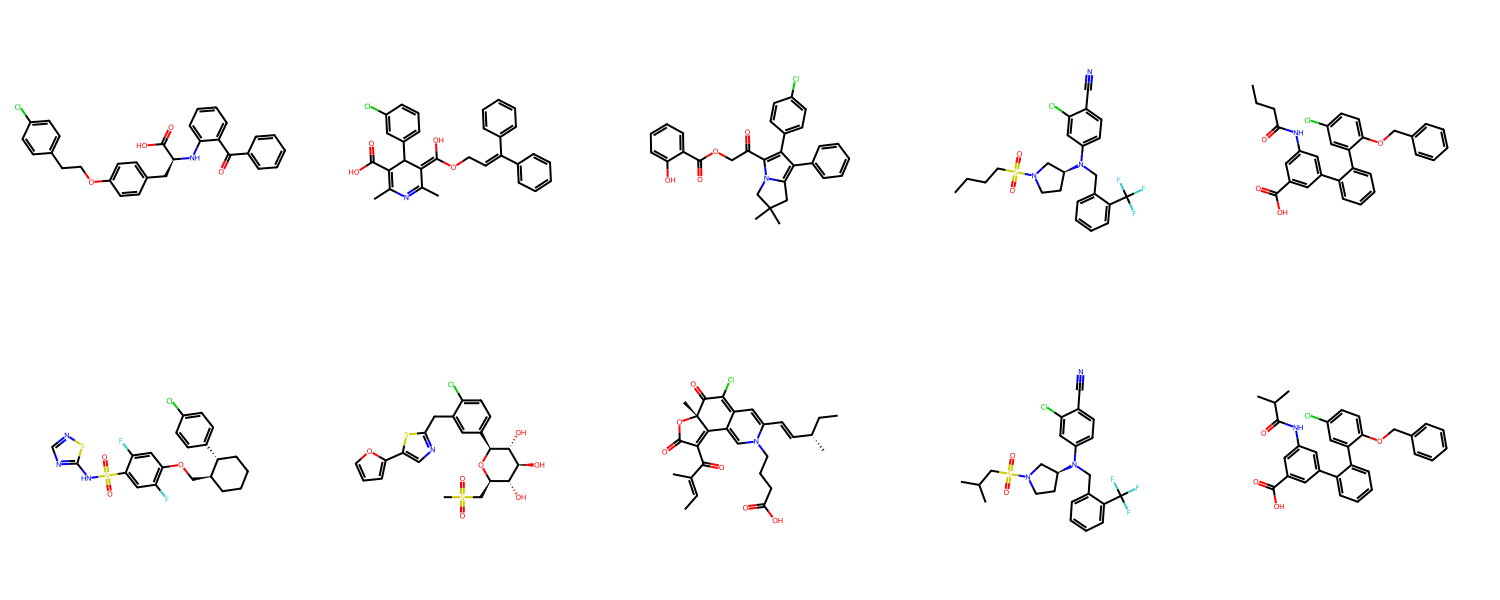

In [9]:
Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))


In [10]:
RDLogger.DisableLog('rdApp.*')         

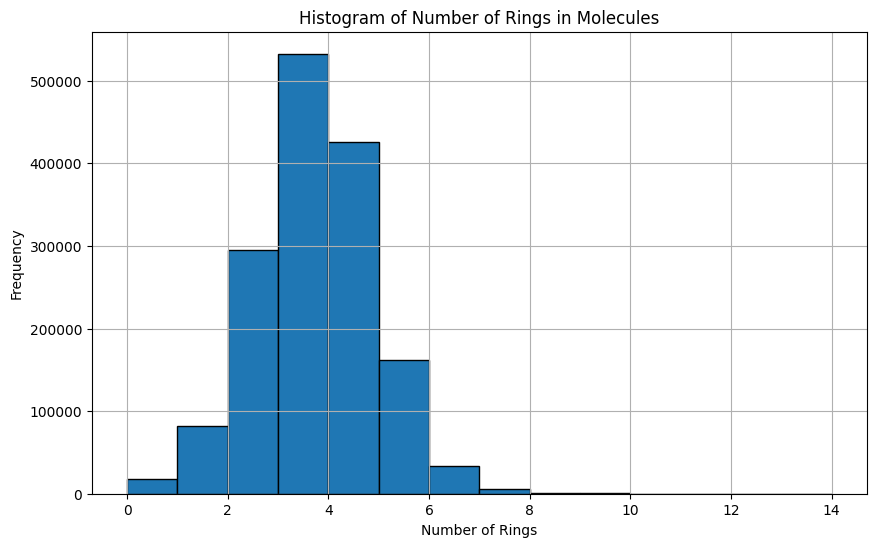

In [11]:
ring_counts = []
for smiles in chembl_data['Smiles']:
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_counts.append(Chem.rdMolDescriptors.CalcNumRings(mol))

ring_counts = [count for count in ring_counts if count is not None]

plt.figure(figsize=(10, 6))
plt.hist(ring_counts, bins=range(min(ring_counts), max(ring_counts) + 1, 1), edgecolor='black')
plt.title('Histogram of Number of Rings in Molecules')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



